# Credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020 : Fraud

About the Dataset
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

Source of Simulation
This was generated using Sparkov Data Generation | Github tool created by Brandon Harris. This simulation was run for the duration - 1 Jan 2019 to 31 Dec 2020. The files were combined and converted into a standard format.

Acknowledgements
Brandon Harris for his amazing work in creating this easy-to-use simulation tool for creating fraud transaction datasets.

L'objectif de ce notebook est de nettoyer inteligemment ce datastet pour rendre intelligible tous les renseignements cachés dans celui ci et obtenir la meilleur performance du modele de ML associé



#### Inscris toi sur kaggle et download les fichiers de la competition sur le lien ci dessus

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import datetime

# Chargement des jeux de données et préparation des train/test

#### Chargement du dataset de train et de test

In [23]:
train=pd.read_csv('fraudTrain.csv')
train

,Unnamed: 0,Unnamed: 0.1,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,750858,2019-11-17 12:56:04,371284100299909,fraud_Hudson-Grady,shopping_pos,1.43,Hannah,Thomas,F,...,34.8698,-100.6806,513,Early years teacher,1976-05-24,3bdb1c47019e9c0df372fc7ad77a8ad2,1353156964,35.525650,-100.501494,0
1,1,601772,2019-09-12 23:14:40,3596357274378601,fraud_Kuhic LLC,shopping_net,5.77,David,Everett,M,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,aed0018cd8c6d99e6fa54254e9b6da1f,1347491680,40.699492,-77.251195,0
2,2,172709,2019-03-31 20:14:15,4988304376504,fraud_Wilkinson PLC,kids_pets,116.99,William,Thompson,M,...,41.4575,-74.1659,2258,Building surveyor,1937-03-17,6cd5ed1ff70a868bfe613ab09ff00659,1333224855,41.467489,-73.901189,0
3,3,56376,2019-02-03 12:52:46,3573030041201292,fraud_Metz-Boehm,shopping_pos,1.86,Joanne,Williams,F,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,4fe58402dbb1d565a0c346c224de4bf9,1328273566,39.783934,-110.651075,0
4,4,247185,2019-05-04 06:09:22,2297447006766555,fraud_Conroy-Cruickshank,gas_transport,63.64,Laura,Walker,F,...,39.9972,-88.6962,478,Landscape architect,1960-01-13,48cce36af104a702edc60213808bccc1,1336111762,39.817124,-88.385375,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,15007,276213,2019-05-16 22:14:57,3533800906065217,fraud_Miller-Harris,misc_net,784.69,Amber,Thornton,F,...,40.2967,-98.7370,493,"Surveyor, minerals",1940-09-13,6ffbdea663c608f84a4093f88a49a8af,1337206497,40.297181,-98.356994,1
15008,15008,603668,2019-09-13 23:22:37,213136802746375,"fraud_Zboncak, Rowe and Murazik",shopping_net,933.01,Christine,Davis,F,...,34.5189,-112.2523,1179,"Civil engineer, contracting",1955-01-20,110704f09e13db7acbbda6e7a2538092,1347578557,35.047879,-113.050898,1
15009,15009,827310,2019-12-09 22:05:01,377654590313960,fraud_Terry-Huel,shopping_net,992.69,Lawrence,Davis,M,...,36.0435,-84.0400,25459,"Teacher, special educational needs",1969-02-22,67f91e6aea40ba119b613ff03615ec38,1355090701,35.775426,-84.705781,1
15010,15010,651885,2019-10-05 03:14:30,6523180720198790,fraud_Murray-Smitham,grocery_pos,294.03,Alan,Taylor,M,...,40.7382,-73.1297,9506,"Biochemist, clinical",1953-04-13,5ea170c562d6a37ae29012266c6a568e,1349406870,39.925956,-73.014095,1


In [24]:
train.sample(50)

,Unnamed: 0,Unnamed: 0.1,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
736,736,1003996,2020-02-16 13:30:39,372509258176510,fraud_Kuhn Group,food_dining,43.40,Kristen,Hanson,F,...,42.9147,-83.4845,6951,Learning disability nurse,1985-06-18,53f6cb6bae337b1668779f671272df4f,1361021439,43.850384,-84.356600,0
4132,4132,246635,2019-05-03 23:41:43,3551217896304745,"fraud_Schumm, McLaughlin and Carter",food_dining,64.97,Sara,Harris,F,...,44.2320,-74.4905,6120,Chartered loss adjuster,1976-10-09,84681180c6543d3ff7ba39c1e383fd2c,1336088503,44.245506,-75.123195,0
11782,11782,494035,2019-08-03 20:05:03,4342532437704183,fraud_Heathcote LLC,shopping_net,1020.20,Kevin,Elliott,M,...,42.2281,-76.1625,4354,Further education lecturer,1994-02-16,a01837d6fccd144fa6839ed770a3d40d,1344024303,42.459708,-76.378691,1
13898,13898,625691,2019-09-23 00:09:53,2610529083834453,fraud_Torphy-Goyette,shopping_pos,698.28,Tanya,Dickerson,F,...,36.2416,-86.6117,22191,Prison officer,1994-07-27,90453290b765904ed1c3426882a6788b,1348358993,35.884288,-87.513318,1
3558,3558,199467,2019-04-13 02:31:02,6554245334757802,"fraud_Stroman, Hudson and Erdman",gas_transport,68.17,Monique,Robinson,F,...,33.6150,-117.7114,45303,Sales executive,1969-12-22,19304351b442d1c8cb8ac28fea52f300,1334284262,34.028510,-117.199302,0
12301,12301,26414,2019-01-15 23:19:23,4789911625179723,fraud_Abbott-Steuber,personal_care,20.09,Dorothy,Zuniga,F,...,40.8095,-72.8229,3285,"Research officer, trade union",1988-04-27,187397e8c4ee0a87c96194bfb27d25d5,1326669563,41.484523,-73.025995,1
5491,5491,1283307,2020-06-16 03:15:53,4195832462863385,fraud_Huels-Hahn,gas_transport,59.32,Victoria,Mcbride,F,...,39.3465,-90.9362,1146,Exercise physiologist,1929-04-07,28306eb7df2ea50c0de8ca89bbc05f2a,1371352553,39.203633,-90.976449,0
6039,6039,649478,2019-10-03 21:22:44,377234009633447,"fraud_Hauck, Dietrich and Funk",kids_pets,60.70,Theresa,Blackwell,F,...,39.3716,-77.8229,1925,Systems developer,1966-02-14,882f8fa0657adc58cca98e43f8383c06,1349299364,38.513340,-76.839055,0
13158,13158,276536,2019-05-17 02:35:31,3518758680062249,fraud_Kutch and Sons,grocery_pos,288.62,Antonio,Koch,M,...,38.5677,-109.5271,9772,Location manager,1989-11-24,f09b88cf14d9c8850cd984db5d31241c,1337222131,39.161336,-108.740838,1
11382,11382,281073,2019-05-19 02:02:18,675990301623,fraud_Strosin-Cruickshank,grocery_pos,317.53,Amanda,Spencer,F,...,41.0767,-74.5982,2456,Senior tax professional/tax inspector,1994-03-13,2f4205c13e72540313e18d008b5cb334,1337392938,41.147211,-74.087962,1


Verifier les doublan des transaction  

In [25]:
print (len(train),len(train.drop_duplicates('trans_num')))

15012 15012


Eleminer les Nan

In [26]:
train.dropna(inplace=True)

In [27]:
train['is_fraud'].value_counts()

1    7506
0    7506
Name: is_fraud, dtype: int64

# Equilibrer la data

In [29]:
train_0 = train[train["is_fraud"] == 0].sample(7506)
train_1 = train[train["is_fraud"] == 1].sample(7506)
train=train_0.merge(train_1, how='outer')
train['is_fraud'].value_counts()


1    7506
0    7506
Name: is_fraud, dtype: int64

Et en pourcentage ?

In [30]:
train['is_fraud'].value_counts()*100/len(train)

1    50.0
0    50.0
Name: is_fraud, dtype: float64

# Analyse du dataset

In [31]:
train.describe(include="all")

,Unnamed: 0,Unnamed: 0.1,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,15012.000000,1.501200e+04,15012,1.501200e+04,15012,15012,15012.000000,15012,15012,15012,...,15012.000000,15012.000000,1.501200e+04,15012,15012,15012,1.501200e+04,15012.000000,15012.000000,15012.000000
unique,NaN,NaN,15003,NaN,693,14,NaN,352,479,2,...,NaN,NaN,NaN,493,964,15012,NaN,NaN,NaN,NaN
top,NaN,NaN,2020-02-21 23:02:22,NaN,fraud_Cormier LLC,grocery_pos,NaN,Christopher,Smith,F,...,NaN,NaN,NaN,Film/video editor,1981-08-29,15540ab7d9958e9e7ddb58fc64efea70,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,NaN,85,2524,NaN,313,297,7881,...,NaN,NaN,NaN,112,45,1,NaN,NaN,NaN,NaN
mean,7505.500000,6.369465e+05,NaN,4.132248e+17,NaN,NaN,299.386632,NaN,NaN,NaN,...,38.606393,-90.032469,9.211684e+04,NaN,NaN,NaN,1.348829e+09,38.602485,-90.037316,0.500000
std,4333.735456,3.873235e+05,NaN,1.300078e+18,NaN,NaN,369.597837,NaN,NaN,NaN,...,5.121694,14.073743,3.133138e+05,NaN,NaN,NaN,1.331736e+07,5.165212,14.092496,0.500017
min,0.000000,2.610000e+02,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,...,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.325388e+09,19.085559,-166.643520,0.000000
25%,3752.750000,2.830935e+05,NaN,1.800401e+14,NaN,NaN,20.410000,NaN,NaN,NaN,...,34.883800,-96.769700,7.430000e+02,NaN,NaN,NaN,1.337452e+09,34.946270,-96.779332,0.000000
50%,7505.500000,6.439610e+05,NaN,3.525668e+15,NaN,NaN,90.775000,NaN,NaN,NaN,...,39.412500,-86.992000,2.501000e+03,NaN,NaN,NaN,1.349034e+09,39.417530,-87.171384,0.500000
75%,11258.250000,9.767432e+05,NaN,4.653879e+15,NaN,NaN,474.022500,NaN,NaN,NaN,...,41.940400,-79.990600,2.013300e+04,NaN,NaN,NaN,1.359661e+09,41.962683,-80.007596,1.000000


Quelles variables sont correllees avec la Fraud carte?

# Colonnes cc_num

Ajouter une colonne numCardLength = la longeur de numéro de carte

In [32]:
train['numCardLength'] = train['cc_num'].astype(str).map(len)


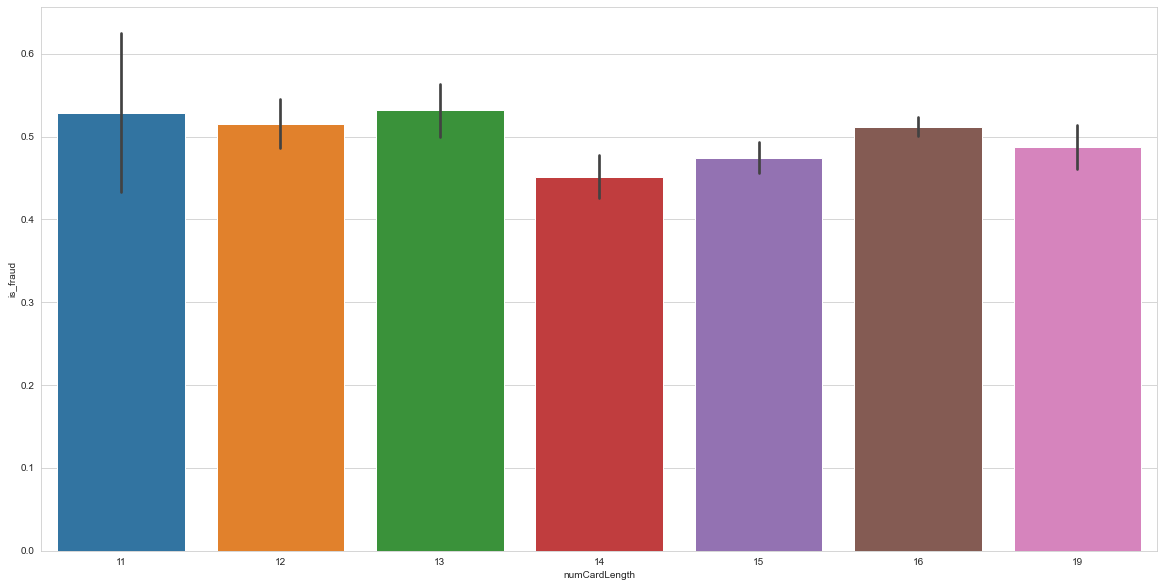

In [33]:
sns.set_style('whitegrid')
tips = sns.load_dataset("tips")
ax = sns.barplot(x="numCardLength", y="is_fraud", data=train)
pyplot.gcf().set_size_inches(20, 10)

===> D'aprés le graph on pourra remarquer que plus la longeur de numero de card est court plus le pourcentage de fraud est élevé  

# Colonnes dob ==> Age 

Ajoute une colonne Age apartir de la date de naissance 

In [34]:
now = pd.Timestamp('now')
train['dob'] = pd.to_datetime(train['dob'], format='%Y-%m-%d') 
train['dob'] = train['dob'].where(train['dob'] < now, train['dob'] -  np.timedelta64(100, 'Y'))   
train['age'] = (now - train['dob']).astype('<m8[Y]')

In [35]:
train['age'] 

0        24.0
1        30.0
2        45.0
3        45.0
4        38.0
         ... 
15007    20.0
15008    23.0
15009    26.0
15010    42.0
15011    23.0
Name: age, Length: 15012, dtype: float64

In [36]:
train.isnull().sum()

Unnamed: 0               0
Unnamed: 0.1             0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
numCardLength            0
age                      0
dtype: int64

In [37]:
train.isna().sum()

Unnamed: 0               0
Unnamed: 0.1             0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
numCardLength            0
age                      0
dtype: int64

Voire la relation entre Age et le fraud 

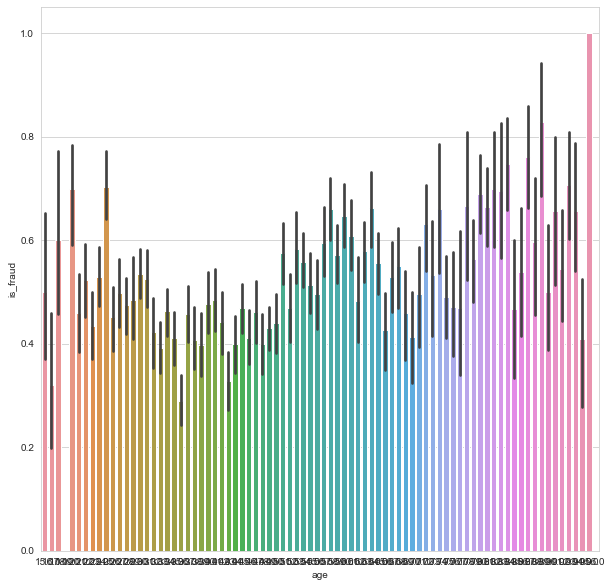

In [38]:

sns.set_style('whitegrid')
tips = sns.load_dataset("tips")
ax = sns.barplot(x="age", y="is_fraud", data=train)
pyplot.gcf().set_size_inches(10, 10)

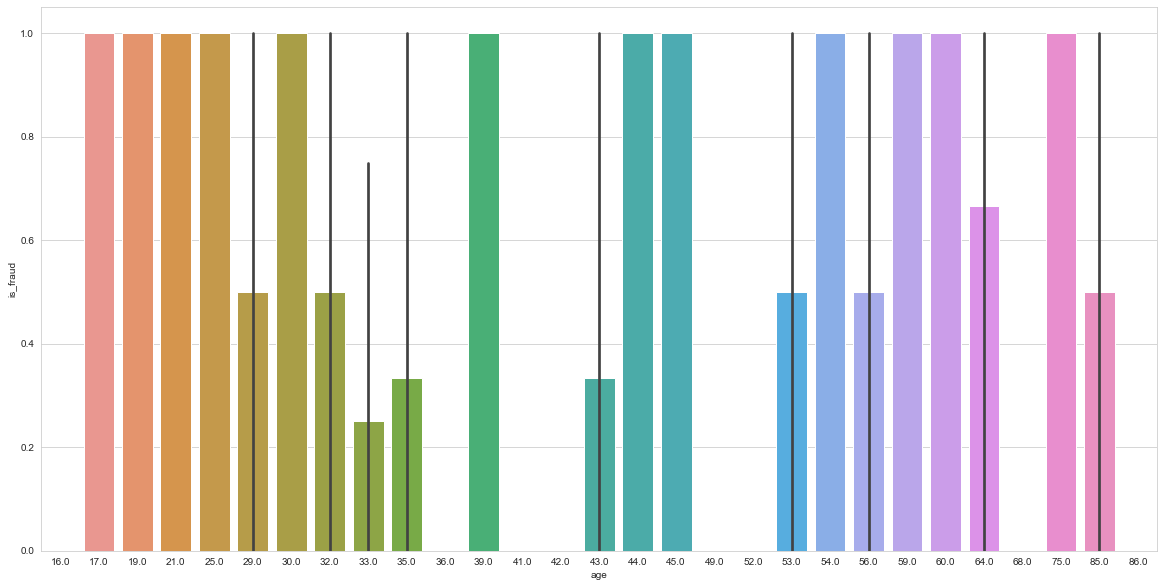

In [39]:
sns.set_style('whitegrid')
tips = sns.load_dataset("tips")
ax = sns.barplot(x="age", y="is_fraud", data=train.sample(50))
pyplot.gcf().set_size_inches(20, 10)

# Colonnes category

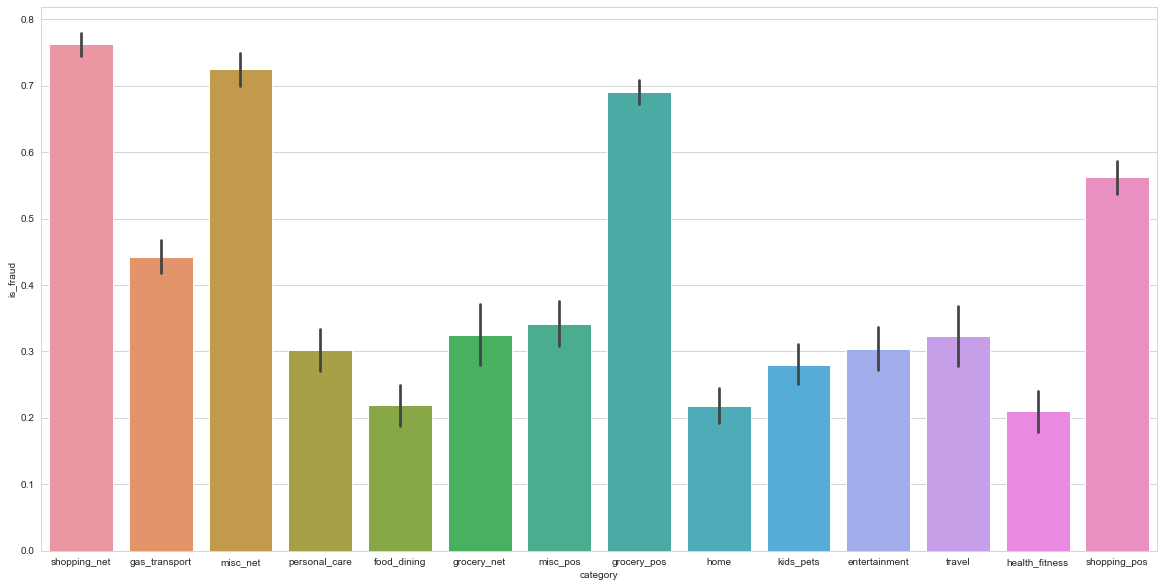

In [40]:
sns.set_style('whitegrid')
tips = sns.load_dataset("tips")
ax = sns.barplot(x="category", y="is_fraud", data=train)
pyplot.gcf().set_size_inches(20, 10)

In [41]:
train['category']=train['category'].map({'gas_transport':0,"travel":1,'health_fitness':2,'misc_net':3,'home.':4,'kids_pets':5,'shopping_pos':6,'entertainment':7,'grocery_pos':8,'food_dining':9,'personal_care':10,'travel':11,'shopping_net':12,'misc_pos':13})

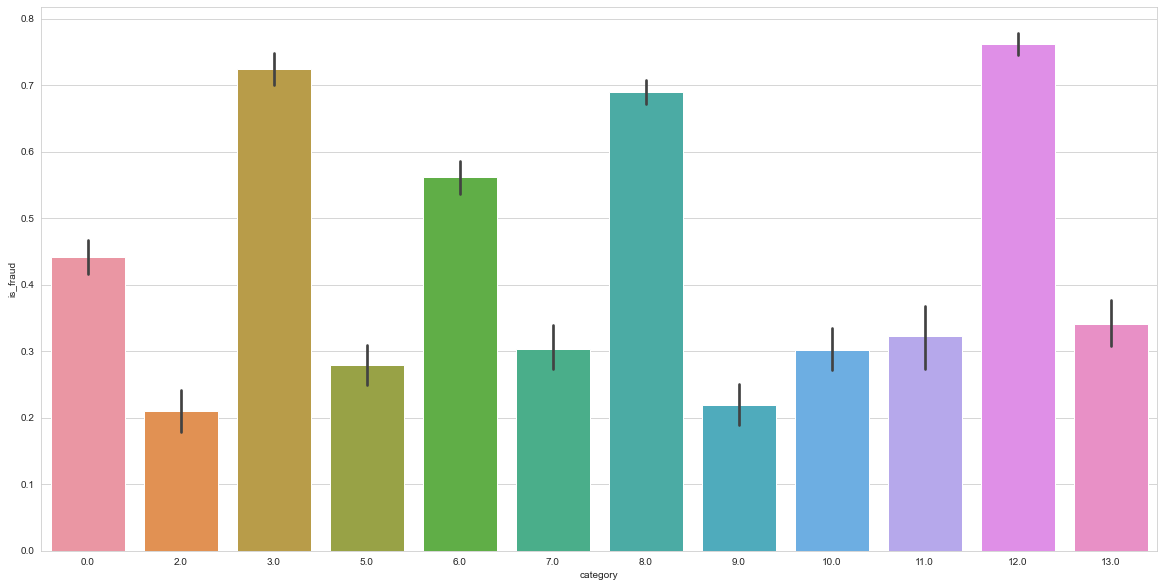

In [42]:
sns.set_style('whitegrid')
tips = sns.load_dataset("tips")
ax = sns.barplot(x="category", y="is_fraud", data=train)
pyplot.gcf().set_size_inches(20, 10)

les achates en ligne est la catégorie la plus élvé de fraud

# Colonnes city Pop

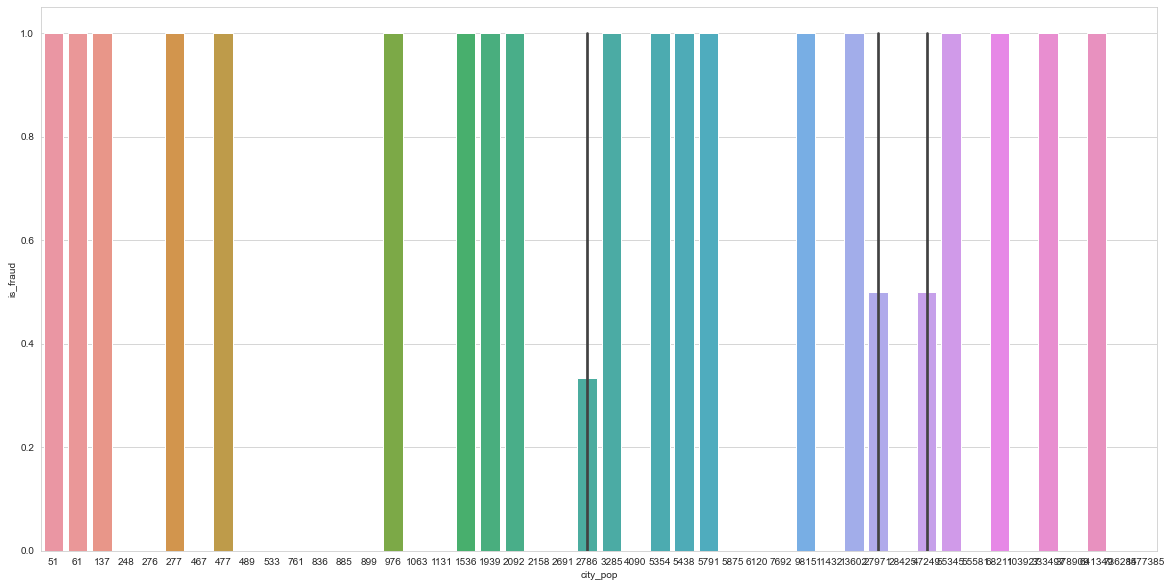

In [43]:
sns.set_style('whitegrid')
tips = sns.load_dataset("tips")
ax = sns.barplot(x="city_pop", y="is_fraud", data=train.sample(50))
pyplot.gcf().set_size_inches(20, 10)



# Colonnes city 

In [44]:
train['city'].value_counts()

Utica              64
Warren             62
San Antonio        61
Houston            61
Tulsa              55
                   ..
Spirit Lake         1
Bonita Springs      1
Dresden             1
Paradise Valley     1
Palmdale            1
Name: city, Length: 891, dtype: int64

# Colonnes state 

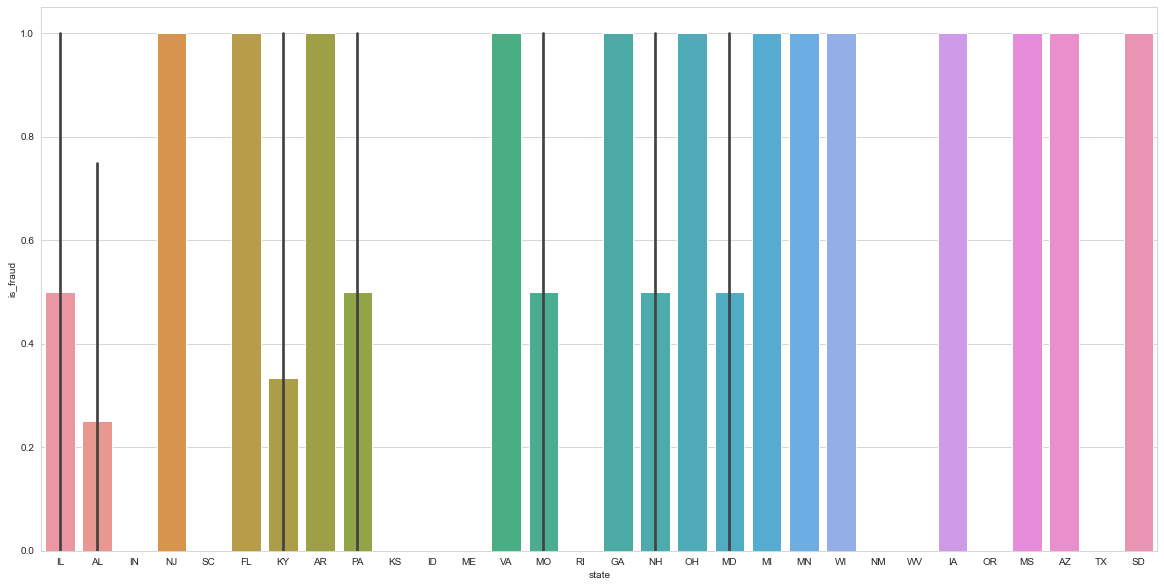

In [45]:
sns.set_style('whitegrid')
tips = sns.load_dataset("tips")
ax = sns.barplot(x="state", y="is_fraud", data=train.sample(50))
pyplot.gcf().set_size_inches(20, 10)

In [46]:
train['state'].value_counts()

NY    1025
TX    1013
PA     934
CA     640
OH     590
FL     522
IL     486
MI     481
AL     426
MO     418
MN     389
AR     360
VA     358
SC     354
WI     352
KY     331
NC     325
OK     318
IN     315
NE     315
MD     307
WV     300
GA     299
KS     292
IA     286
NJ     273
OR     256
MS     254
TN     237
WY     229
ME     218
LA     208
CO     203
WA     196
NM     179
VT     162
SD     154
ND     136
MA     126
UT     120
NH     116
AZ      96
MT      91
NV      75
CT      57
AK      51
ID      45
DC      37
HI      26
RI      22
DE       9
Name: state, dtype: int64

In [47]:
train['state']=train['state'].map({"NY":0,"TX":1,"AL":2,"FL":3,"IL.":4,"MO":5,"PA":6,"VA":7,"NM":8,"SC":9,"IN":10,"MI":11,"NC":12,"OH":13,"MN":14,"KS":15,"OR":16,"TN":17,"LA.":18,"NH":19,"IA":20,"WI":21,"CA":22,"NE":23,"MT":24,"ND":25,"WA":26,"VT":27,"MA":28,"KY":29,"UT":30,"ID":31,"DC.":32,"AR":33,"WY":34,"OK":35,"NV":36,"GA":37,"CT":38,"MS":39,"MD":40,"NJ":41})

In [48]:
train['state']

0         NaN
1        25.0
2         3.0
3         NaN
4        17.0
         ... 
15007     0.0
15008    20.0
15009    17.0
15010     0.0
15011    40.0
Name: state, Length: 15012, dtype: float64

D'apres les information qu'on a on pourra pas predir le fraud par rapport à la popullation 

# Colonnes gebder = M/F

Comparer entre les fraud de femme et celui de le homme

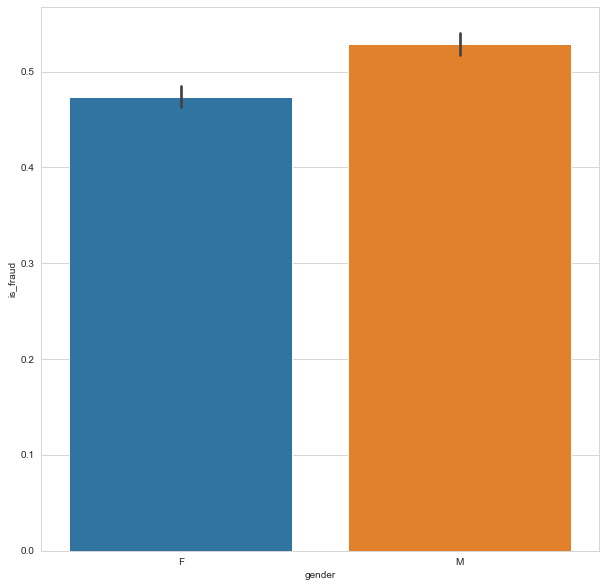

In [49]:
sns.set_style('whitegrid')
tips = sns.load_dataset("tips")
ax = sns.barplot(x="gender", y="is_fraud", data=train)
pyplot.gcf().set_size_inches(10, 10)

In [50]:
train['gender'].value_counts()

F    7881
M    7131
Name: gender, dtype: int64

Le nombre des femme est superieur à celui de femme mais les hommes sont les plus frauder 

le nombre de fraude chez les hommes et légerment superieur que celui de femmes 

ici on va voire la relation entre le fraud et la catégorie (lieu ou types de fraud )

In [51]:
train.isna().sum()

Unnamed: 0                  0
Unnamed: 0.1                0
trans_date_trans_time       0
cc_num                      0
merchant                    0
category                 1320
amt                         0
first                       0
last                        0
gender                      0
street                      0
city                        0
state                    1810
zip                         0
lat                         0
long                        0
city_pop                    0
job                         0
dob                         0
trans_num                   0
unix_time                   0
merch_lat                   0
merch_long                  0
is_fraud                    0
numCardLength               0
age                         0
dtype: int64

# Nettoiage des colonnes

In [52]:
train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'trans_date_trans_time', 'cc_num',
       'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'numCardLength', 'age'],
      dtype='object')

In [53]:
train.rename(columns=lambda x: x.replace('Unnamed: 0', 'id'), inplace=True)


In [54]:
train.drop(['trans_date_trans_time'], axis='columns', inplace=True)
train.drop(['cc_num'], axis='columns', inplace=True)
train.drop(['merchant'], axis='columns', inplace=True)
train.drop(['category'], axis='columns', inplace=True)
train.drop(['long'], axis='columns', inplace=True)
train.drop(['job'], axis='columns', inplace=True)
train.drop(['unix_time'], axis='columns', inplace=True)
train.drop(['merch_lat'], axis='columns', inplace=True)
train.drop(['merch_long'], axis='columns', inplace=True)
train.drop(['street'], axis='columns', inplace=True)
train.drop(['first'], axis='columns', inplace=True)
train.drop(['last'], axis='columns', inplace=True)
train.drop(['city'], axis='columns', inplace=True)
train.drop(['zip'], axis='columns', inplace=True)
train.drop(['lat'], axis='columns', inplace=True)
train.drop(['dob'], axis='columns', inplace=True)
train.drop(['id'], axis='columns', inplace=True)
train.drop(['trans_num'], axis='columns', inplace=True)

In [55]:
train

,id.1,amt,gender,state,city_pop,is_fraud,numCardLength,age
0,647569,8.01,F,NaN,203571,0,16,24.0
1,771895,90.56,F,25.0,77,0,16,30.0
2,879544,28.27,M,3.0,42619,0,19,45.0
3,197031,32.10,F,NaN,320420,0,16,45.0
4,710838,25.01,M,17.0,4729,0,16,38.0
...,...,...,...,...,...,...,...,...
15007,320874,777.44,M,0.0,782,1,15,20.0
15008,95122,1021.53,F,20.0,1075,1,16,23.0
15009,144892,466.76,F,17.0,391389,1,14,26.0
15010,598620,113.03,F,0.0,3255,1,16,42.0


In [56]:
train['gender']=train['gender'].map({'M':0,"F":1})
train['gender']

0        1
1        1
2        0
3        1
4        0
        ..
15007    0
15008    1
15009    1
15010    1
15011    1
Name: gender, Length: 15012, dtype: int64

#### J'aimerais recuperer les Nan(s) de la colonne backers_count (20%)

# Modélisation / Prédiction

#### Piocher dans la librairie sklearn des modeles de classification (RandomForest, Gradient Boost, LogisticRegression, ...) et realiser plusieurs modeles. Evaluer leur performance via accuracy_score() 

In [57]:
train =train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split




X=train[['amt','gender','state','city_pop','numCardLength','age','is_fraud']].dropna(subset=['numCardLength'])
y=X['is_fraud'].copy()
del X['is_fraud']
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)
#reg = LinearRegression(normalize=True,fit_intercept=True).fit(X, y)
cls = RandomForestClassifier(max_depth=14,n_estimators=300, random_state=0).fit(x_train, y_train) #80%
cls.score(x_val, y_val) #%20


0.9053388867853086

Bon, c'est pas terrible comme accuracy 86,94% mais on va commencer comme cela .Je sauve mon modèle (reg) en format pickle (.pkl)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val,cls.predict(x_val))

In [ ]:
import pickle

# save the model to disk
filename = 'cls_numCardLength_model.pkl'
pickle.dump(cls, open(filename, 'wb'))

# load the model from disk
cls = pickle.load(open(filename, 'rb'))
cls

In [ ]:
pd.qcut(train['city_pop'], 7)

Je reprend ce découpage par intervalle que je nomme labels=[]) et essayons d'observer si un label a plus de chance de survie que d'autres

In [ ]:


#classer les ages dans catégories
train["city_pop"] = train["city_pop"]

bins = [0, 22, 346, 911, 4000,  1923, 4542,14783, np.inf]
print(bins)
labels = ['22', '346', '911', '4000', '1923', '4542', '14783','2906700']
train['city_popGroup'] = pd.cut(train['city_pop'], bins, labels =labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="city_popGroup", y="is_fraud", data=train)
plt.show()



